<a href="https://colab.research.google.com/github/davidduran1365/GameOfThronesReviews/blob/main/GoT_reviews_labeled_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
reviews_df=pd.read_csv('/content/sample_data/Game of Thrones reviews.csv')
reviews_df.head()

,Season,Stars,Review
0,1,4.5,"This is an epic masterpiece, a huge free sandb..."
1,1,4.5,Damn why did I wait so long after the show to ...
2,1,2.5,se não fosse as cenas de sexo nem teria paciên...
3,1,1.0,"A ser funado en 3,2,1 pero... no conecte nada ..."
4,1,5.0,Season 1 of Game of Thrones delivers a remarka...


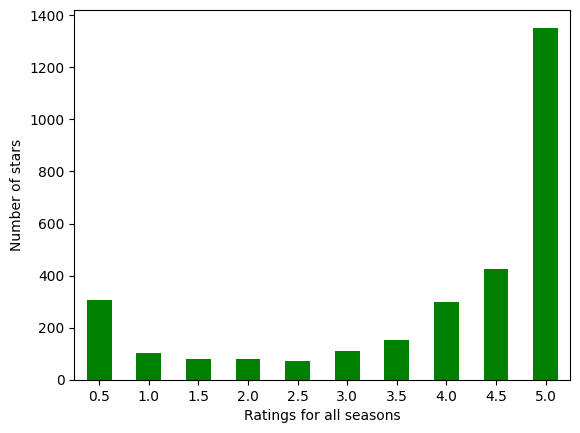

In [ ]:
rating_counts = reviews_df['Stars'].value_counts().sort_index()
rating_counts.plot(kind='bar', color='green')
plt.xlabel('Ratings for all seasons')
plt.ylabel('Number of stars')
plt.xticks(rotation=0)
plt.show()

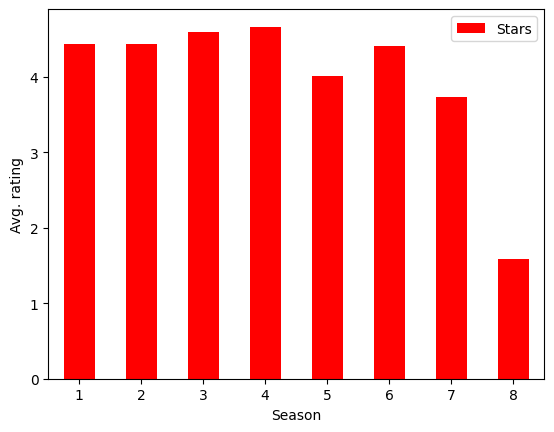

In [ ]:
rating_mean=reviews_df.groupby('Season')['Stars'].mean()
ax=rating_mean.plot(kind='bar', color='red', legend=True)
plt.xlabel('Season')
plt.ylabel('Avg. rating')
plt.xticks(rotation=0)
plt.show()

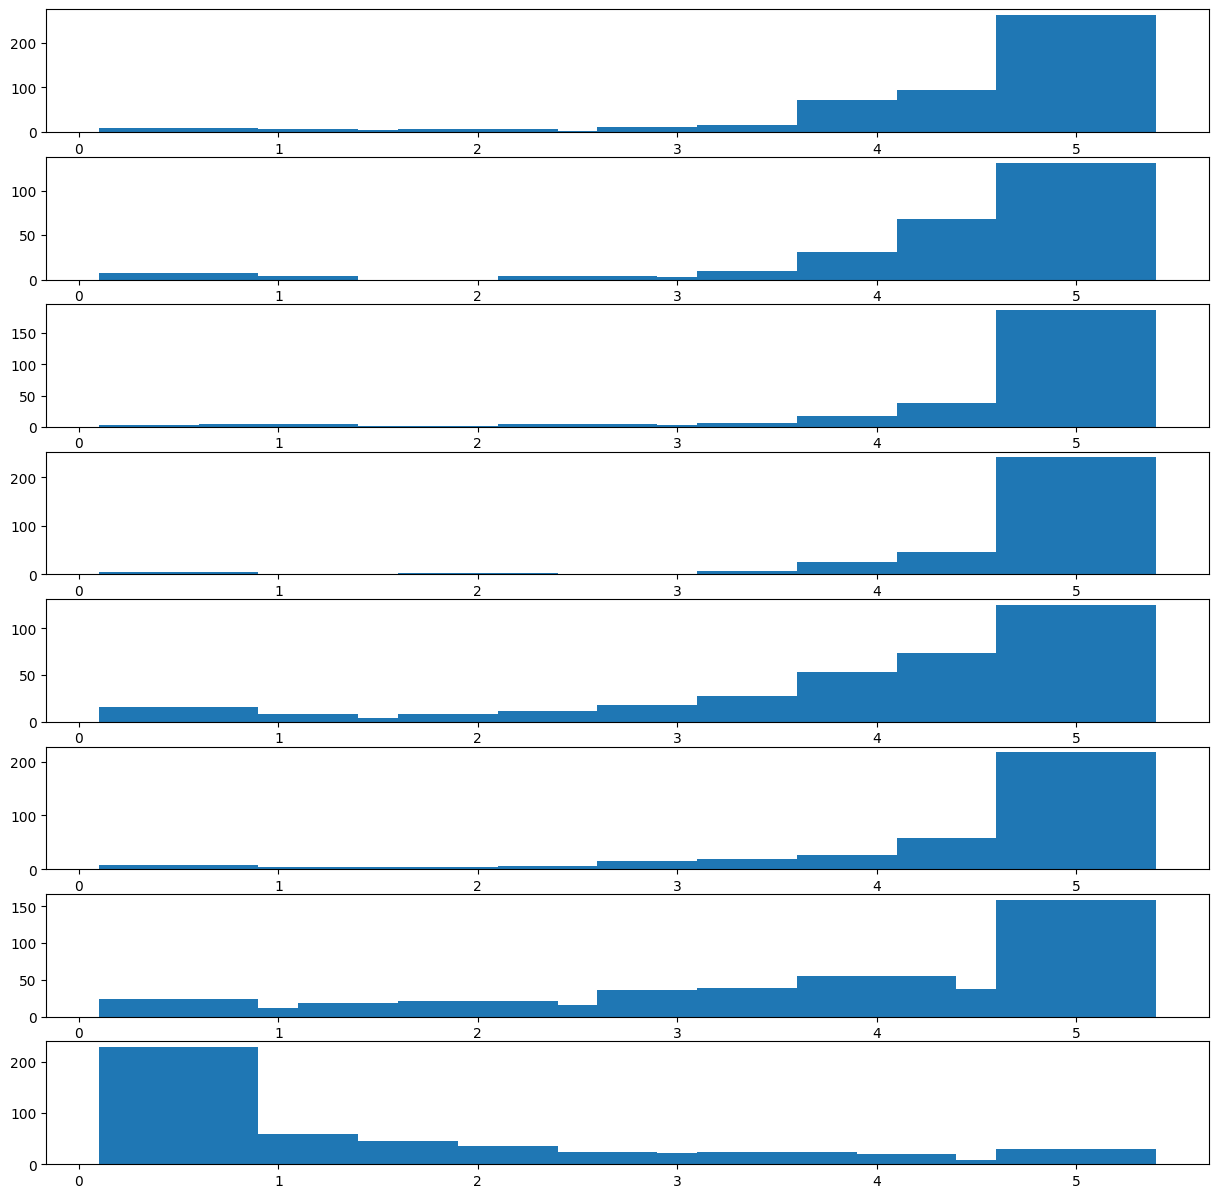

In [ ]:
fig, ax=plt.subplots(8, figsize=(15,15))
number_of_ratings=[rating for rating in reviews_df['Stars'].unique()]
for i in range(len(reviews_df['Season'].unique())):
  rating_counts = reviews_df[reviews_df['Season']==i+1]['Stars'].value_counts().sort_index()
  #ax[i].plot(rating_counts)
  rating_counts=rating_counts.reindex(number_of_ratings, fill_value=0)
  ax[i].bar(number_of_ratings,rating_counts)

plt.show()

Season    1    2    3    4    5    6    7    8
Stars                                         
0.5      10    8    4    6   16    9   24  229
1.0       6    4    5    2    8    5   12   60
1.5       4    0    1    1    4    4   19   46
2.0       6    0    1    3    8    4   21   35
2.5       3    4    5    0   12    6   16   25
3.0      11    3    3    2   18   15   37   23
3.5      16   10    6    8   28   20   39   24
4.0      71   31   17   26   53   27   55   20
4.5      94   68   38   46   74   58   38    9
5.0     262  132  187  241  125  217  159   29


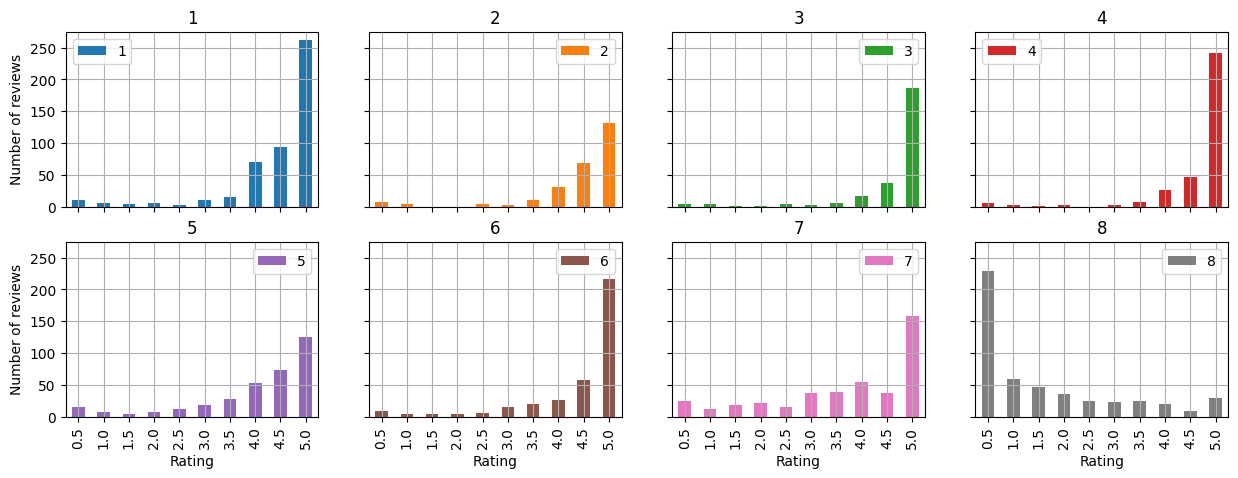

In [ ]:
#test=reviews_df.groupby(['Season','Stars'])['Stars'].value_counts().unstack(level=0,fill_value=0)
test=reviews_df.groupby('Season')['Stars'].value_counts().unstack(level=0,fill_value=0)
#test['Stars']=test['Stars'].reindex(number_of_ratings, fill_value=0)
print(test)
test.plot(subplots=True, layout=(2,4), figsize=(15,5), kind='bar', sharey=True, xlabel='Rating', ylabel='Number of reviews', grid=True)
plt.show()

In [ ]:
reviews_df['Word count']=reviews_df['Review'].str.count(' ')+1
reviews_df.head()

,Season,Stars,Review,Word count
0,1,4.5,"This is an epic masterpiece, a huge free sandb...",32
1,1,4.5,Damn why did I wait so long after the show to ...,19
2,1,2.5,se não fosse as cenas de sexo nem teria paciên...,12
3,1,1.0,"A ser funado en 3,2,1 pero... no conecte nada ...",11
4,1,5.0,Season 1 of Game of Thrones delivers a remarka...,21


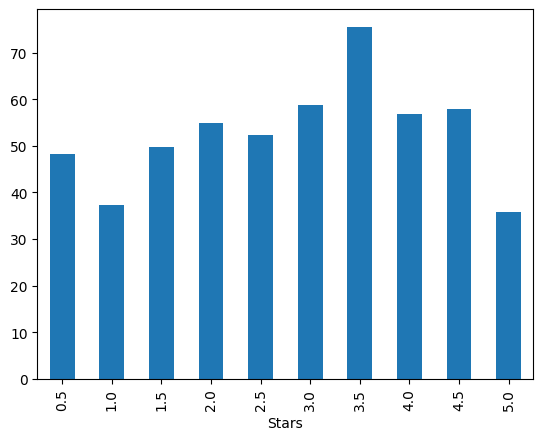

In [ ]:
test2=reviews_df.groupby('Stars')['Word count'].mean()
test2.plot(kind='bar')
plt.show()

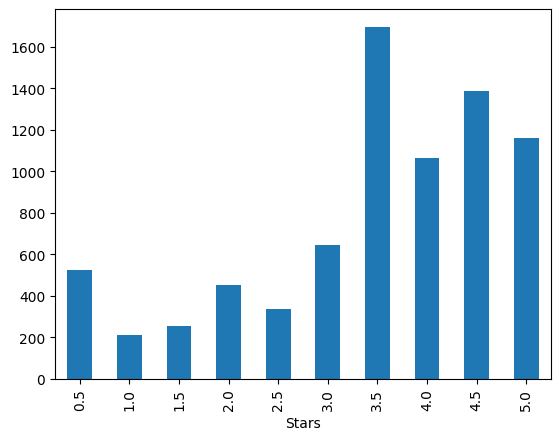

In [ ]:
test2=reviews_df.groupby('Stars')['Word count'].max()
test2.plot(kind='bar')
plt.show()

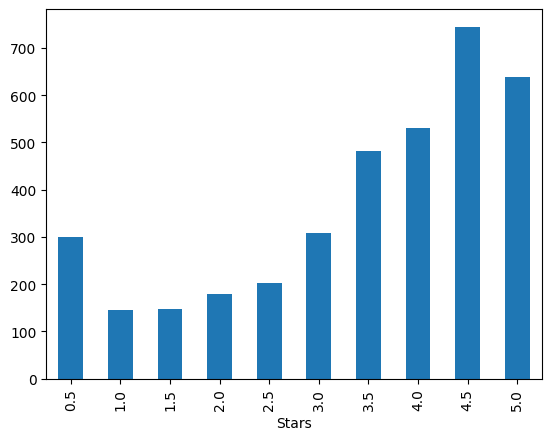

In [ ]:
test2=reviews_df.groupby('Stars')['Word count'].nlargest(10)
test2=test2.groupby('Stars').mean()
test2.plot(kind='bar')
plt.show()

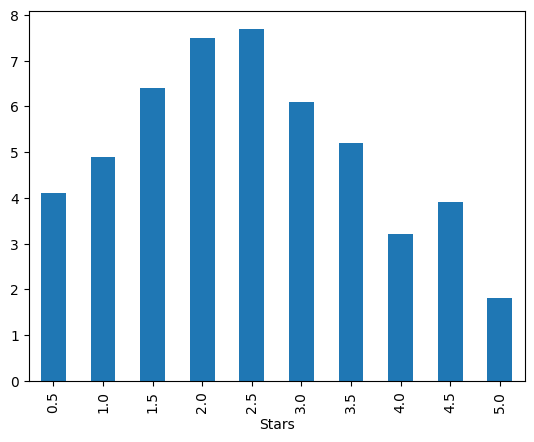

In [ ]:
test2=reviews_df.groupby('Stars')['Word count'].nsmallest(10)
test2=test2.groupby('Stars').mean()
test2.plot(kind='bar')
plt.show()

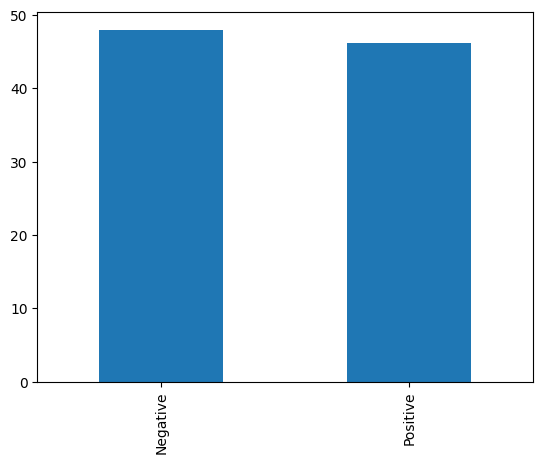

In [ ]:
condition_clause=np.where(reviews_df['Stars']>2.5,'Positive', 'Negative')
test3=reviews_df.groupby(condition_clause)['Word count'].mean()
#test3=test3.groupby(condition_clause).mean()
test3.plot(kind='bar')
plt.show()

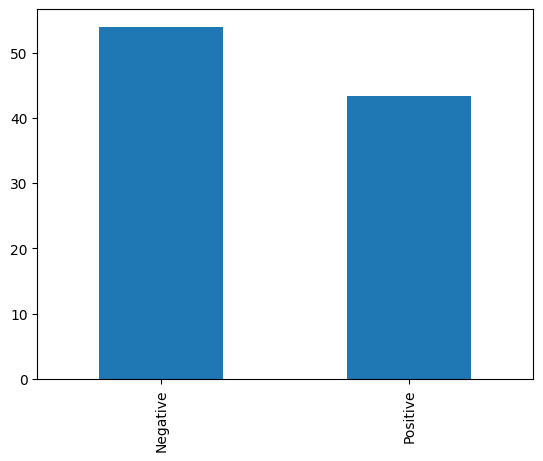

In [ ]:
condition_clause=np.where(reviews_df['Stars']>3.5,'Positive', 'Negative')
test3=reviews_df.groupby(condition_clause)['Word count'].mean()
#test3=test3.groupby(condition_clause).mean()
test3.plot(kind='bar')
plt.show()

# Words analysis

In [ ]:
!pip install nltk

In [ ]:
import re

def remove_punctuation(sentence:str):
  rule=r'[^\w\s]'
  return re.sub(rule, '', sentence)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Negative     636
Positive    2340
Name: Review, dtype: int64
Positive words: 8920
[('season', 2112), ('show', 988), ('best', 656), ('game', 632), ('thrones', 628), ('series', 565), ('great', 517), ('one', 511), ('characters', 508), ('episode', 381), ('good', 366), ('still', 342), ('story', 333), ('ever', 322), ('first', 320), ('tv', 310), ('episodes', 299), ('like', 290), ('seasons', 280), ('time', 252)]
Negative words: 4028
[('season', 500), ('show', 285), ('seasons', 158), ('series', 133), ('like', 126), ('characters', 123), ('one', 122), ('story', 102), ('ending', 99), ('time', 96), ('character', 96), ('bad', 94), ('got', 93), ('8', 89), ('good', 83), ('great', 82), ('even', 82), ('rushed', 82), ('plot', 81), ('final', 79)]


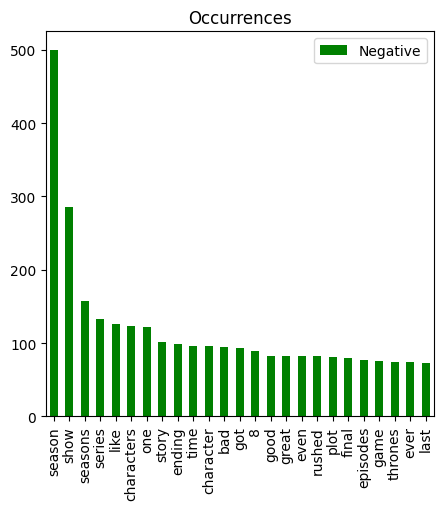

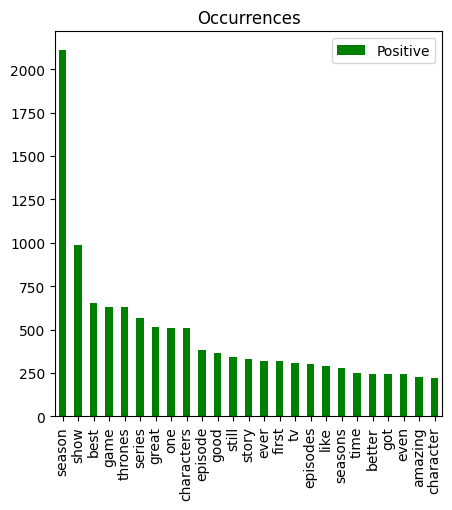

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')


stop_words=set(stopwords.words('english'))
condition_clause=np.where(reviews_df['Stars']>2.5,'Positive', 'Negative')
print(reviews_df.groupby(condition_clause)['Review'].count())
test3=reviews_df.groupby(condition_clause)['Review']
#pos_neg_labels=['Negative','Positive']
pos_neg_words=[]

for i,item in enumerate(test3):

  chain=[]
  for j,review in enumerate(item[1]):
    tokenized_sentence=nltk.tokenize.word_tokenize(remove_punctuation(review), language='english')
    cleaned_string=[word.lower() for word in tokenized_sentence if word.lower() not in stop_words]
    chain.extend(cleaned_string)

  pos_neg_words.append(chain)


neg_frecuency_list=FreqDist(pos_neg_words[0])
pos_frecuency_list=FreqDist(pos_neg_words[1])
freq_words_df=pd.DataFrame(columns=['Feeling','Word','Occurrences'])

print("Positive words: "+str(len(pos_frecuency_list)))
print(pos_frecuency_list.most_common(20))
print("Negative words: "+str(len(neg_frecuency_list)))
print(neg_frecuency_list.most_common(20))
pos_pd=pd.DataFrame(pos_frecuency_list.most_common(25), columns=['Word', 'Occurrences'])
pos_pd.insert(0,'Feeling',['Positive' for i in range(25)], True)
neg_pd=pd.DataFrame(neg_frecuency_list.most_common(25), columns=['Word', 'Occurrences'])
neg_pd.insert(0,'Feeling',['Negative' for i in range(25)], True)

freq_words_df=pd.concat([freq_words_df, neg_pd])
freq_words_df=pd.concat([freq_words_df, pos_pd])

plots=freq_words_df.groupby('Feeling').plot(subplots=True, kind='bar', figsize=(5,5), color='green')

p=int(freq_words_df.shape[0]/2)
plots[0][0].set_xticklabels(freq_words_df['Word'][:p])
plots[0][0].legend([freq_words_df.iloc[0,0]])
plots[1][0].set_xticklabels(freq_words_df['Word'][p:])
plots[1][0].legend([freq_words_df.iloc[p,0]])

plt.show()

#print(freq_words_df.head(30))

**Analysis by POS**

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

As function

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tag import pos_tag
#import pandas as pd
nltk.download('punkt')

def get_freq_by_POS(reviews:pd.DataFrame, split_punctuation:int, requested_pos_tag:str, num_of_words:int):
  requested_df=pd.DataFrame(columns=['Feeling','Word','Occurrences'])
  condition_clause=np.where(reviews['Stars']>split_punctuation,'Positive', 'Negative')
  pos_neg_labels=['Negative','Positive']
  print(reviews.groupby(condition_clause)['Review'].count())
  grouped_reviews=reviews.groupby(condition_clause)['Review']
  pos_neg_text=[] #new

  for i,item in enumerate(grouped_reviews):
    text='' #new

    for j,review in enumerate(item[1]):
      text+=review+' '#new

    pos_neg_text.append(text)#new

  for i, reviews_text in enumerate(pos_neg_text):
    frequency_by_POS=FreqDist(pos_tag(word_tokenize(reviews_text)))
    full_freq=frequency_by_POS.most_common(len(frequency_by_POS))
    count=0
    requested_list=[]

    for item in full_freq:
      if item[0][1]==requested_pos_tag:
        requested_list.append([pos_neg_labels[i],item[0][0],item[1]])
        count+=1
        if(count==num_of_words):
          break
    requested_df=pd.concat([requested_df,pd.DataFrame(requested_list, columns=['Feeling','Word','Occurrences'])])
  return requested_df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df_POS=get_freq_by_POS(reviews_df,2.5,'JJ',25)

Negative     636
Positive    2340
Name: Review, dtype: int64


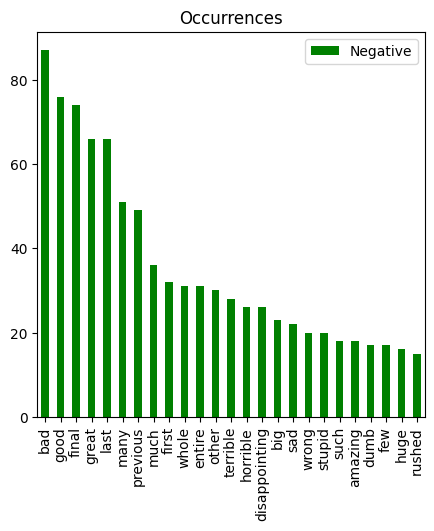

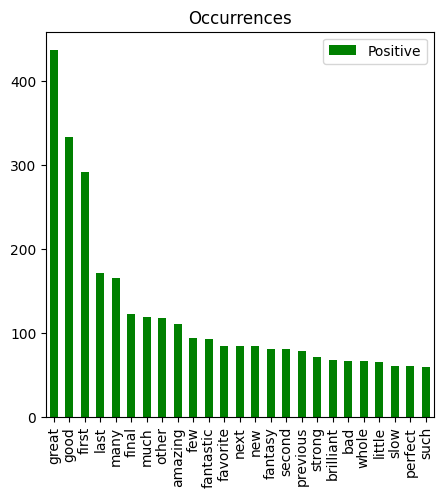

In [ ]:
#print(df_POS.head())

plots=df_POS.groupby('Feeling').plot(subplots=True, kind='bar', figsize=(5,5), color='green')
p=int(df_POS.shape[0]/2)
plots[0][0].set_xticklabels(df_POS['Word'][:p])
plots[0][0].legend([df_POS.iloc[0,0]])
plots[1][0].set_xticklabels(df_POS['Word'][p:])
plots[1][0].legend([df_POS.iloc[p,0]])

plt.show()

In [ ]:
df_POS=get_freq_by_POS(reviews_df,2.5,'NN',25)

Negative     636
Positive    2340
Name: Review, dtype: int64


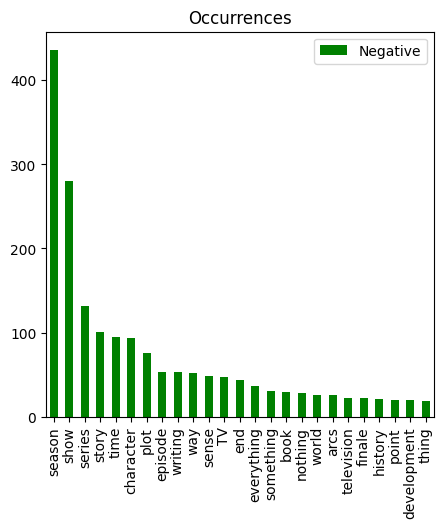

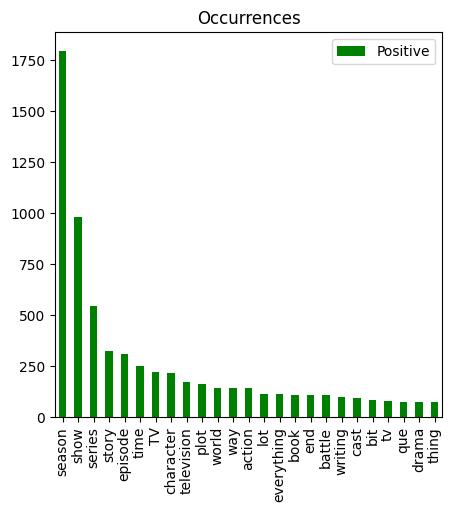

In [ ]:
plots=df_POS.groupby('Feeling').plot(subplots=True, kind='bar', figsize=(5,5), color='green')
p=int(df_POS.shape[0]/2)
plots[0][0].set_xticklabels(df_POS['Word'][:p])
plots[0][0].legend([df_POS.iloc[0,0]])
plots[1][0].set_xticklabels(df_POS['Word'][p:])
plots[1][0].legend([df_POS.iloc[p,0]])

plt.show()